In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('block_2.csv', sep=';')

In [3]:
df.head()

,item_id,From,Count,Date,Level,VIP
0,10004,Store1,2,9/29/2017,2,1
1,20004,Store1,10,9/29/2017,5,1
2,10001,Store2,64,9/29/2017,1,0
3,20002,Store2,25,9/29/2017,1,1
4,30002,Store2,46,9/29/2017,2,0


In [4]:
df.dtypes

item_id     int64
From       object
Count       int64
Date       object
Level       int64
VIP         int64
dtype: object

In [5]:
df.Date=pd.to_datetime(df.Date)

In [6]:
df.head()

,item_id,From,Count,Date,Level,VIP
0,10004,Store1,2,2017-09-29,2,1
1,20004,Store1,10,2017-09-29,5,1
2,10001,Store2,64,2017-09-29,1,0
3,20002,Store2,25,2017-09-29,1,1
4,30002,Store2,46,2017-09-29,2,0


In [7]:
df.dtypes

item_id             int64
From               object
Count               int64
Date       datetime64[ns]
Level               int64
VIP                 int64
dtype: object

In [8]:
df.item_id.value_counts()

30005    270
20002    265
10005    258
30004    250
30006    245
30003    230
20006    224
30007    219
20003    215
10006    211
20001    208
10007    199
10008    188
10009    186
20004    176
20005    175
20008    170
30008    170
20007    168
10004    162
30002    154
30009    151
20009    130
10003    113
10002    105
30001     82
10001     71
Name: item_id, dtype: int64

In [9]:
def sep_int (x,i):
    m=[]
    for j in x:
        m.append(int(str(abs(j))[i]))
    return m

In [10]:
df['items_type']=sep_int(df.item_id,0)
df['items_quality']=sep_int(df.item_id,-1)

In [11]:
df.head()

,item_id,From,Count,Date,Level,VIP,items_type,items_quality
0,10004,Store1,2,2017-09-29,2,1,1,4
1,20004,Store1,10,2017-09-29,5,1,2,4
2,10001,Store2,64,2017-09-29,1,0,1,1
3,20002,Store2,25,2017-09-29,1,1,2,2
4,30002,Store2,46,2017-09-29,2,0,3,2


In [12]:
df_gr=df.groupby(['From','items_type','items_quality','VIP','Level','Date'], as_index=False).\
                    agg({'Count':'sum'}).\
                    rename(columns={'Count':'count_items'})

In [13]:
df_gr.head(10)

,From,items_type,items_quality,VIP,Level,Date,count_items
0,Sale1,1,2,1,4,2017-10-05,216
1,Sale1,1,2,1,4,2017-10-06,248
2,Sale1,1,2,1,4,2017-10-22,152
3,Sale1,1,3,1,3,2017-10-18,440
4,Sale1,1,3,1,4,2017-10-18,256
5,Sale1,1,3,1,5,2017-10-07,248
6,Sale1,1,3,1,5,2017-10-12,152
7,Sale1,1,3,1,5,2017-10-13,224
8,Sale1,1,3,1,5,2017-10-15,176
9,Sale1,1,3,1,6,2017-10-18,424


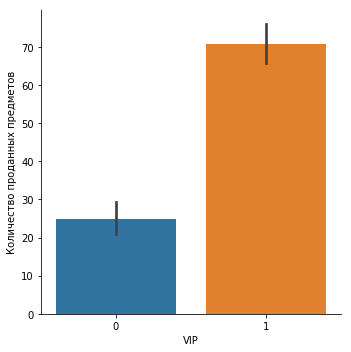

In [14]:
g=sns.catplot(x="VIP", y="count_items", data=df_gr, kind="bar")
g.set_ylabels('Количество проданных предметов')
plt.savefig("1.jpeg")

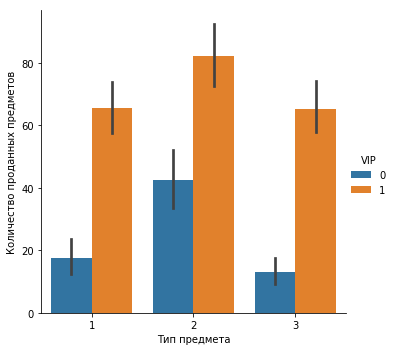

In [15]:
g=sns.catplot(x="items_type", y="count_items", hue='VIP', data=df_gr, kind="bar")
g.set_ylabels('Количество проданных предметов')
g.set_xlabels('Тип предмета')
plt.savefig("2.jpeg")

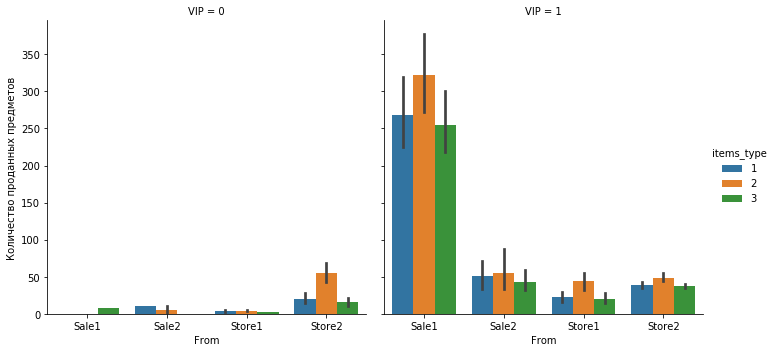

In [16]:
g=sns.catplot(x="From", y="count_items", hue="items_type", data=df_gr, kind="bar", col='VIP')
g.set_ylabels('Количество проданных предметов')
plt.savefig("3.jpeg")

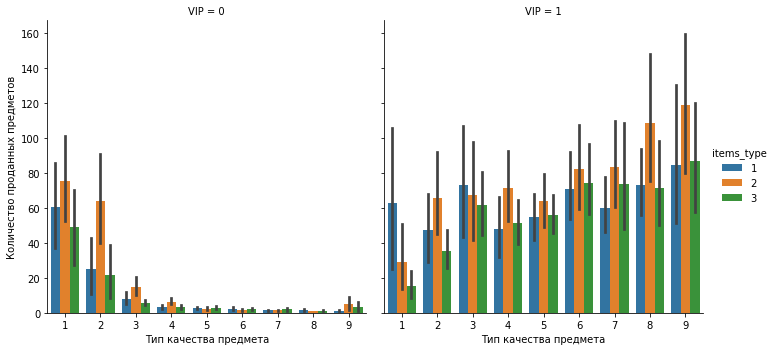

In [17]:
g=sns.catplot(x="items_quality", y="count_items",hue='items_type', data=df_gr, kind="bar", col='VIP')
g.set_ylabels('Количество проданных предметов')
g.set_xlabels('Тип качества предмета')
plt.savefig("4.jpeg")

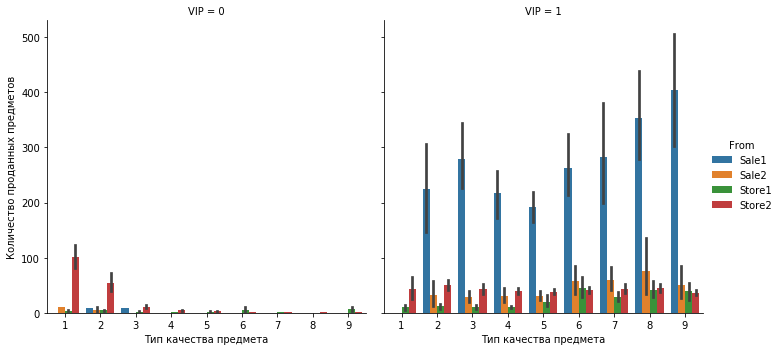

In [18]:
g=sns.catplot(hue="From", y="count_items", x="items_quality", data=df_gr, kind="bar", col='VIP')
g.set_ylabels('Количество проданных предметов')
g.set_xlabels('Тип качества предмета')
plt.savefig("5.jpeg")

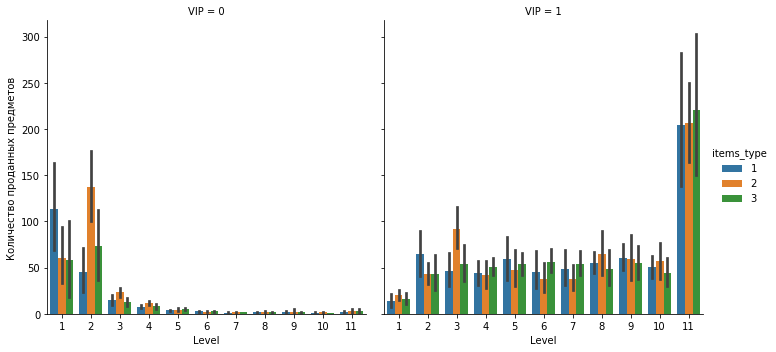

In [19]:
g=sns.catplot(x="Level", y="count_items", hue='items_type', data=df_gr,  kind="bar", col='VIP')
g.set_ylabels('Количество проданных предметов')
plt.savefig("6.jpeg")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


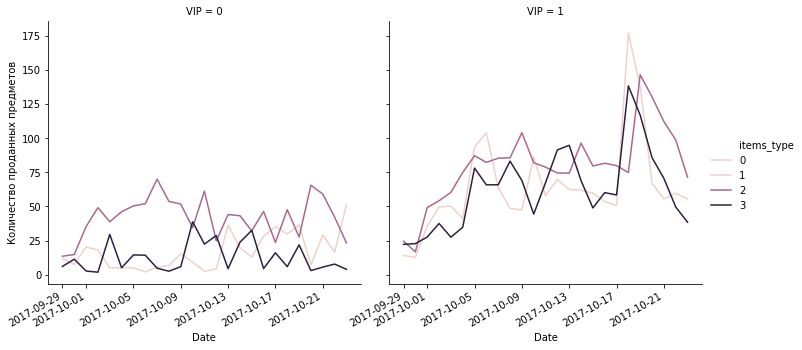

In [20]:
g=sns.relplot(x="Date", y="count_items", hue='items_type', data=df_gr,  kind="line", col='VIP', ci=None)
g.set_ylabels('Количество проданных предметов')
g.fig.autofmt_xdate()
plt.savefig("7.jpeg")

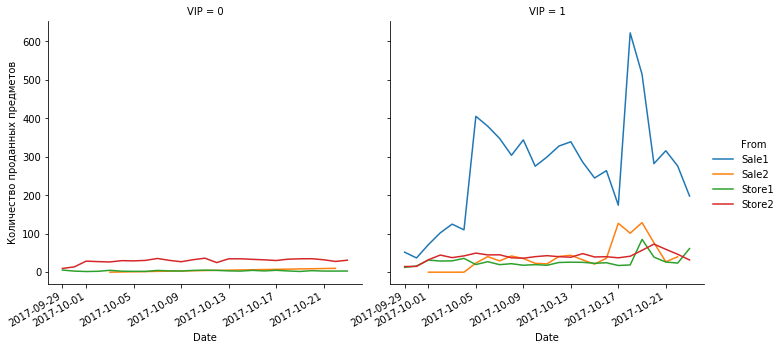

In [21]:
g=sns.relplot(x="Date", y="count_items", hue='From', data=df_gr,  kind="line", col='VIP', ci=None)
g.set_ylabels('Количество проданных предметов')
g.fig.autofmt_xdate()
plt.savefig("8.jpeg")